In [ ]:
%pip install scipy
%pip install matplotlib
%pip install SpeechRecognition
%pip install wave

Conversão para .WAV

In [ ]:
# import required modules 
import subprocess 

# convert to wav file 
subprocess.call(['ffmpeg', '-i', 'drake.mp3', 
                 'drake.wav'])

Conversão audios estereos para mono

Text(0, 0.5, 'Amplitute')

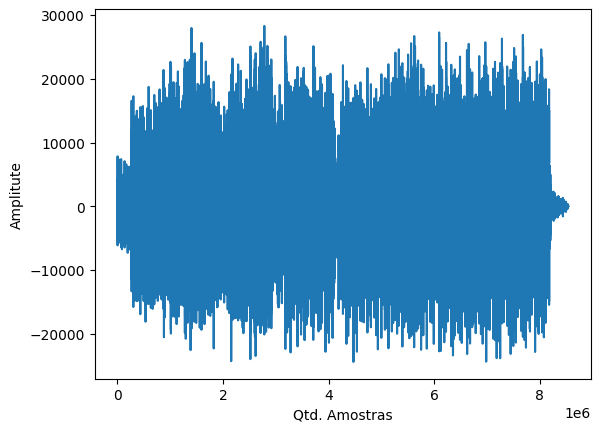

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as wav

rate, data = wav.read('dido.wav')

# somando os dois canais e normalizando (passando de estereo para mono)
data = np.sum(data, axis=1) / 2 
plt.plot(data)
plt.xlabel('Qtd. Amostras')
plt.ylabel('Amplitute')

Converter qtd. amostra para tempo (Eixo X)

Text(0, 0.5, 'Amplitute')

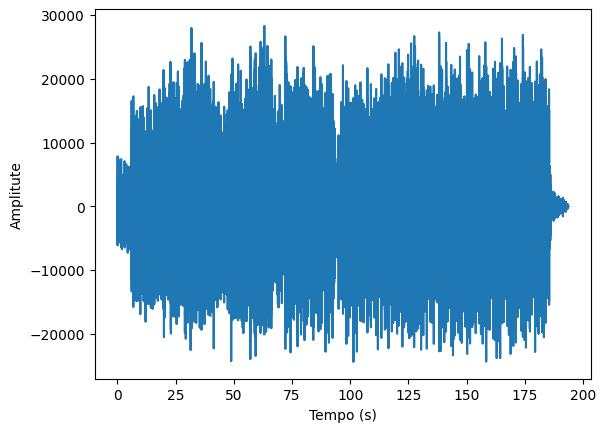

In [70]:
# encontrar o comprimento (total de amostras)
n = len(data)

# Frequencia de amostragem por sinal (quantas amostras por segundo)
fs = 44100 #48khz (audio) ou 44100 44.1khz (padrao spotify apple music) 
# https://emastered.com/pt/blog/sample-rate-for-audio#:~:text=A%20melhor%20taxa%20de%20amostragem,da%20sua%20onda%20sonora%20original.


T = 1/fs # tempo entre uma amostra e outra (inverso entre uma amostra e outra)

t = np.arange(0,n/fs,T) # (vetor de tempo) começa em 0seg, vai até o valor final do comprimento / frequencia de amostragem, e vai andando de T em T (valor calculado na variavel T)

plt.plot(t, data)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitute')

Transformada de Fourier

Text(0, 0.5, 'Amplitute')

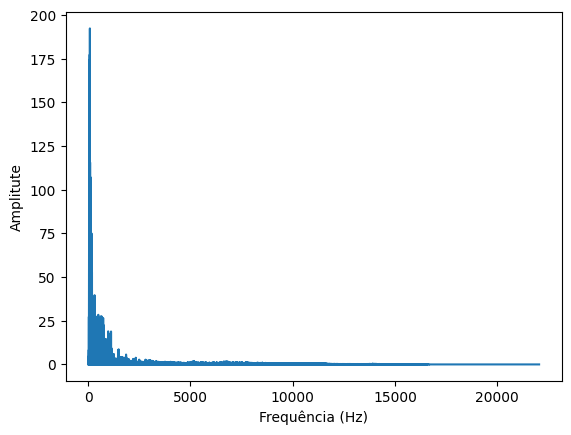

In [71]:
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# saindo de segundos e indo para hz
f = fftfreq(n,T)

# numero complexo (transformada)
transf = fft(data)

# módulo - para tirar os números complexos (módulo)
transf = np.abs(transf)

plt.plot(f[f > 0],transf[f > 0]*1/n) # mascara para pegar apenas os sinais com frequencias maiores que zeros e normalização o eixo vertical (dividir a transformada pelo tamanho do sinal)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitute')

In [72]:
chunksize = 1024
chunks = int(len(transf) / chunksize)
result = []

for j in range(chunks):
    arraychunk = np.zeros(chunksize, dtype=complex)
    for i in range(chunksize):
        arraychunk[i] = complex(transf[(j * chunksize) + i])
    result.append(arraychunk)
print(result[0])

[95410720.5       +0.j   702648.61125012+0.j   306674.45492792+0.j ...
  1276502.61837843+0.j  1211455.34108648+0.j  1207834.56861461+0.j]


In [75]:
ranges = np.array([40, 80, 120, 180, 300])
fuzfactor = 2

result_length = len(result)
highscores = [[0] * len(ranges) for _ in range(result_length)]
points = [[0] * len(ranges) for _ in range(result_length)]

for t in range(result_length):
    for freq in range(40, 300):
        
        if result[t][freq] > 0:
            
            mag = np.log(np.abs(result[t][freq]) + 1)

            
            i = 0
            while ranges[i] < freq:
                i += 1
            index = i

           
            if mag > highscores[t][index]:
                highscores[t][index] = mag
                points[t][index] = freq
    
    
    h = (points[t][3] - (points[t][3] % fuzfactor)) * 100000000 + \
        (points[t][2] - (points[t][2] % fuzfactor)) * 100000 + \
        (points[t][1] - (points[t][1] % fuzfactor)) * 100 + \
        (points[t][0] - (points[t][0] % fuzfactor))
    
print(f"hashtag for music is: {h}")

hashtag for music is: 12011805440
